## Dataset : [free spoken digits](https://www.kaggle.com/abdelrahmangamil/freespokendigits)

In [1]:
import os
#print(os.listdir('./recordings'))

In [2]:
data_path = './recordings'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import librosa
import os
from os.path import isdir, join
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.io import wavfile
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
def load_speeches(path):
    waves = [f for f in os.listdir(path) if f.endswith('.wav')]
    labels = []
    samples_rate = []
    all_waves = []
    for wav in waves:
        sample_rate, samples = wavfile.read(join(path,wav))
        samples_rate.append(sample_rate)
        labels.append(wav[0])
        all_waves.append(samples)
    return all_waves ,samples_rate,labels

In [5]:
def get_spectrograms(waves):
    sample_rate = 8000
    spectros = []
    freqs = []
    tims = []
    for wav in waves:
        frequencies, times, spectrogram = signal.spectrogram(wav, sample_rate)
        freqs.append(frequencies)
        tims.append(times)
        spectros.append(spectrogram)
    return freqs,tims,spectros
        

In [6]:
all_waves,samples_rate,labels = load_speeches(data_path) #len(labels) = 3000

In [7]:
max_sequence_len = max([len(x) for x in all_waves])
all_waves = np.array(pad_sequences(all_waves, maxlen=max_sequence_len, padding='post'))


In [8]:
freqs,tims,spectros = get_spectrograms(all_waves)

5
3
1
2
4
3
4
3
1
1
0
6
5
9
9
4
1
4
1
5


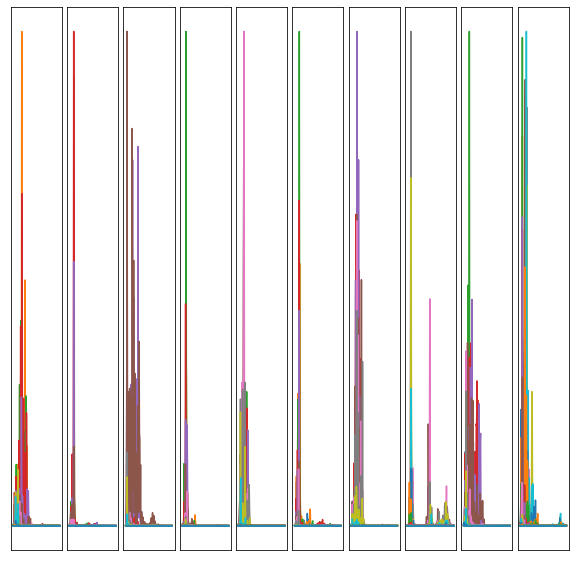

In [16]:
spectros[3].shape
fig, ax = plt.subplots(10))
for i in range(10):
    ax[i].plot(freqs[i], spectros[i])
for i in range(10):
    print(labels[i])

In [10]:
spectros = np.array(spectros)
spectros = spectros.reshape(3000,129,81,1)

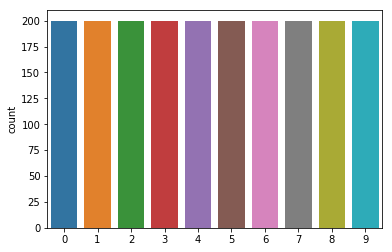

In [11]:
sns.countplot(labels)

In [12]:
import keras
labels = tf.keras.utils.to_categorical(labels, 10)

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(spectros, labels, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K
import tensorflow as tf

In [15]:
X.shape[1:]

(129, 81, 1)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', input_shape=(129, 81,1)),
  tf.keras.layers.Conv2D(32,(5,5), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout((0.5)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer = tf.keras.optimizers.Adam( epsilon=1e-08), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X,Y,batch_size=512,epochs=100,validation_data=(X_test,Y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 6s 4ms/sample - loss: 2783.9408 - acc: 0.1625 - val_loss: 82.4205 - val_acc: 0.3075
Epoch 2/100
1600/1600 [==============================] - 1s 571us/sample - loss: 82.0395 - acc: 0.2450 - val_loss: 16.2208 - val_acc: 0.3650
Epoch 3/100
1600/1600 [==============================] - 1s 560us/sample - loss: 23.8768 - acc: 0.2688 - val_loss: 8.9033 - val_acc: 0.4125
Epoch 4/100
1600/1600 [==============================] - 1s 544us/sample - loss: 13.5684 - acc: 0.3181 - val_loss: 5.1225 - val_acc: 0.4150
Epoch 5/100
1600/1600 [==============================] - 1s 543us/sample - loss: 9.2086 - acc: 0.3050 - val_loss: 3.1718 - val_acc: 0.4725
Epoch 6/100
1600/1600 [==============================] - 1s 543us/sample - loss: 6.0166 - acc: 0.3506 - val_loss: 2.9031 - val_acc: 0.4950
Epoch 7/100
1600/1600 [==============================] - 1s 543us/sample - loss: 4.0478 - acc: 0.3913 - val_loss:

0.95

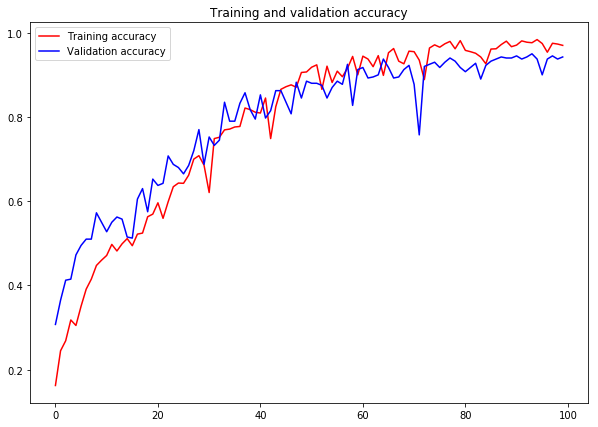

<Figure size 432x288 with 0 Axes>

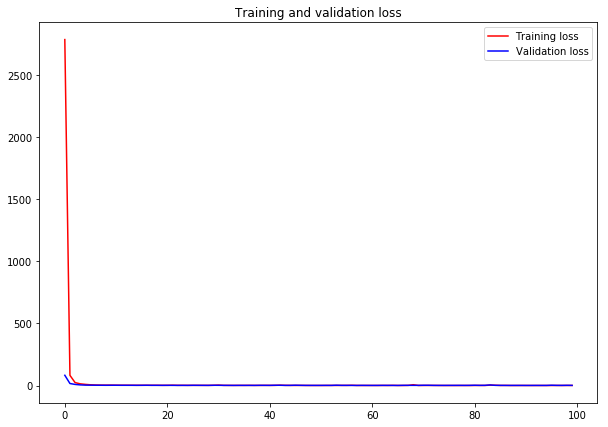

<Figure size 432x288 with 0 Axes>

In [19]:

%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
history = model.history
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.legend(['Training loss','Validation loss'])
plt.figure()
max(val_acc) #the best validation accuracy the model have got